# Project Report IV: Finally, Some Data Analysis!
___
**Brief:**<br>
In this report, I'll be taking on the unsupervised and then supervised learning tasks for my project.

**Sections:**<br>
1. [Failed Unsupervised Learning: A Prologue](#1)
2. [Data Exploration](#2)
    - [DateTime and Chronology](#2a)
    - [A Census of the Users](#2b)
    - [Word Data at the User Level](#2c)
___
<a id='1'>

## Failed Unsupervised Learning: A Prologue
<a id='1a'>

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import nltk
from nltk.corpus import PlaintextCorpusReader as cr
import pandas as pd
import numpy as np
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
import pickle
file = open('email_df', 'rb')
email_df = pickle.load(file)
file.close()

In [3]:
small_df = email_df.sample(20000)
small_df[:5]

,Date,From,To,Subject,Cc,Bcc,X-From,X-To,X-cc,X-bcc,X-Folder,X-FileName,Text,Folder,User
199721,"Wed, 4 Apr 2001 09:19:00 -0700 (PDT)",vince.kaminski@enron.com,kate@powerbrokersllc.com,Re: Joao Neves,vince.kaminski@enron.com,vince.kaminski@enron.com,Vince J Kaminski,"""Kate Szablya"" <kate@powerbrokersllc.com> @ ENRON",Vince J Kaminski,,\Vincent_Kaminski_Jun2001_1\Notes Folders\All ...,vkamins.nsf,"Kate,\n\nI was traveling recently. I shall eva...",all_documents,kaminski-v
93570,"Tue, 2 May 2000 10:02:00 -0700 (PDT)",chris.dorland@enron.com,carla.o'neil@enron.com,,1.0,Carla M O'Neil,,,\Chris_Dorland_Dec2000\Notes Folders\All docum...,Dorland-C,cdorlan.nsf,None,"Carla,\n\nI need to book the computer training...",all_documents,dorland-c
168942,"Tue, 25 Dec 2001 21:28:00 -0800 (PST)",enron_update@concureworkplace.com,stanley.horton@enron.com,Expense Reports Awaiting Your Approval,1.0,"Horton, Stanley </O=ENRON/OU=NA/CN=RECIPIENTS/...",,,"\Stanley_Horton_Jan2002\Horton, Stanley\Inbox",Horton-S,shorton (Non-Privileged).pst,None,The following reports have been waiting for yo...,inbox,horton-s
143466,"Sun, 15 Apr 2001 11:18:00 -0700 (PDT)",bill.iii@enron.com,portland.shift@enron.com,PNM parking for Monday,1.0,Portland Shift,,,\mark guzman 6-28-02\Notes Folders\All documents,GUZMAN-M,mark guzman 6-28-02.nsf,None,We have parking with PNM for off-peak on Monda...,all_documents,guzman-m
54587,"Tue, 17 Apr 2001 00:41:00 -0700 (PDT)",ann.schmidt@enron.com,Enron Mentions,1.0,text/plain; charset=us-ascii,,,\Jeff_Dasovich_June2001\Notes Folders\All docu...,DASOVICH-J,jdasovic.nsf,None,None,Enron Corp. Says First-Quarter Profit Rose 20 ...,all_documents,dasovich-j


*Note*: So at this point, there is just too much data. Going to use "small_df" the rest of the way.<br>
*Python Note*: We need .sample() here! I did this whole thing without it and it was just two users...

In [4]:
#vectorizer = TfidfVectorizer(stop_words="english")
#text_tfidf = vectorizer.fit_transform(text)
#text_tfidf

In [5]:
#from sklearn.cluster import KMeans
#k_model = KMeans(n_clusters=3)
#k_model.fit(text_tfidf)
#k_model.predict(text_tfidf)
#labels = k_model.labels_

In [6]:
#import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D
#plot = plt.figure()
#ax = Axes3D(plot, rect=[0, 0, 0.95, 1], elev=48, azim=134)
#ax.scatter(text[:, 3], text[:, 0], text[:, 2],
#          c=labels.astype(np.float), edgecolor="k", s=50)
#ax.set_xlabel("x")
#ax.set_ylabel("y")
#ax.set_zlabel("z")
#plt.title("K Means", fontsize=14)

*Summary*: So, ultimately this has been a very confusing experience for me. I tried to take on unsupervised learning, but I'm really finding myself learning much more on tutorials than I'd like to. Instead, let's take a step back and look other parts of the data, then revisit this.
<a id='2'>

## Data Exploration
<a id='2a'>

***DateTime and Chronology***<br>
Much of what follows is inspired by a fantastic resource I found on Kaggle (https://www.kaggle.com/dfoly1/k-means-clustering-from-scratch). I'll be using it to help organize my DF better (the _to_datetime_ thing and much of the unsupervised learning).

My first goal is to get a sense of when these emails were sent, so we'll be using the DateTime library!

In [7]:
small_df['Date'] = pd.to_datetime(small_df['Date'], infer_datetime_format=True)

In [8]:
months = []
days = []
years = []
for date in small_df['Date']:
    months.append(date.month)
    days.append(date.day)
    years.append(date.year)
small_df["Month"] = months
small_df["Day"] = days
small_df["Year"] = years
small_df[:5]

,Date,From,To,Subject,Cc,Bcc,X-From,X-To,X-cc,X-bcc,X-Folder,X-FileName,Text,Folder,User,Month,Day,Year
199721,2001-04-04 09:19:00-07:00,vince.kaminski@enron.com,kate@powerbrokersllc.com,Re: Joao Neves,vince.kaminski@enron.com,vince.kaminski@enron.com,Vince J Kaminski,"""Kate Szablya"" <kate@powerbrokersllc.com> @ ENRON",Vince J Kaminski,,\Vincent_Kaminski_Jun2001_1\Notes Folders\All ...,vkamins.nsf,"Kate,\n\nI was traveling recently. I shall eva...",all_documents,kaminski-v,4,4,2001
93570,2000-05-02 10:02:00-07:00,chris.dorland@enron.com,carla.o'neil@enron.com,,1.0,Carla M O'Neil,,,\Chris_Dorland_Dec2000\Notes Folders\All docum...,Dorland-C,cdorlan.nsf,None,"Carla,\n\nI need to book the computer training...",all_documents,dorland-c,5,2,2000
168942,2001-12-25 21:28:00-08:00,enron_update@concureworkplace.com,stanley.horton@enron.com,Expense Reports Awaiting Your Approval,1.0,"Horton, Stanley </O=ENRON/OU=NA/CN=RECIPIENTS/...",,,"\Stanley_Horton_Jan2002\Horton, Stanley\Inbox",Horton-S,shorton (Non-Privileged).pst,None,The following reports have been waiting for yo...,inbox,horton-s,12,25,2001
143466,2001-04-15 11:18:00-07:00,bill.iii@enron.com,portland.shift@enron.com,PNM parking for Monday,1.0,Portland Shift,,,\mark guzman 6-28-02\Notes Folders\All documents,GUZMAN-M,mark guzman 6-28-02.nsf,None,We have parking with PNM for off-peak on Monda...,all_documents,guzman-m,4,15,2001
54587,2001-04-17 00:41:00-07:00,ann.schmidt@enron.com,Enron Mentions,1.0,text/plain; charset=us-ascii,,,\Jeff_Dasovich_June2001\Notes Folders\All docu...,DASOVICH-J,jdasovic.nsf,None,None,Enron Corp. Says First-Quarter Profit Rose 20 ...,all_documents,dasovich-j,4,17,2001


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
x_ax = (small_df["Year"] >= 1995) & (small_df["Year"] <= 2005)
fig = plt.figure()
graphYears = small_df.loc[x_ax].groupby("Year")["Text"].count().plot()
fig.savefig('graphYears.png')

fig = plt.figure()
barYears = sns.catplot(x='Year',data=small_df,kind='count')
fig.savefig('barYears.png')

x_ax = (small_df["Year"] == 2000)
fig = plt.figure()
graph2000 = small_df.loc[x_ax].groupby("Month")["Text"].count().plot()
fig.savefig('graph2000.png')

x_ax = (small_df["Year"] == 2001)
fig = plt.figure()
graph2001 = small_df.loc[x_ax].groupby("Month")["Text"].count().plot()
fig.savefig('graph2001.png')

x_ax = (small_df["Year"] == 2002)
fig = plt.figure()
graph2002 = small_df.loc[x_ax].groupby("Month")["Text"].count().plot()
fig.savefig('graph2002.png')

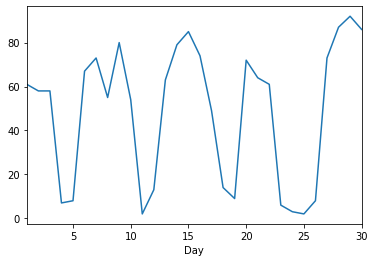

In [10]:
x_ax = (small_df["Year"] == 2000) & (small_df["Month"] == 11)
fig = plt.figure()
graph_911 = small_df.loc[x_ax].groupby("Day")["Text"].count().plot()
fig.savefig('graph911.png')

*Note*: Because this is only a sample of 20,000, the data gets small on a month-to-month basis. However, this corpus could also give us insights on how people reacted to major world events. I'd assume absolutely nobody was emailing on 9/11, but it would be interesting to see what the existing emails say.

**Summary**: As we can see here, our 20,000 emails are only distributed over four years, peaking over 2000 and 2001. This checks out with what we know about the Enron Scandal. I'd be interested to see if the years get wider over a larger sample?
<a id='2b'>

***A Census of The Users***

In [11]:
setTo = small_df["To"].nunique()
setFrom = small_df["From"].nunique()
totalSet = len(small_df)
print("percentage of emails to unique people:", (setTo/totalSet)*100)
print("percentage of emails from unique people:", (setFrom/totalSet)*100)

percentage of emails to unique people: 42.964999999999996
percentage of emails from unique people: 19.255


*Note*: Very round, whole numbers. Satisfying.

In [12]:
toUsers = (((small_df.groupby("User")["To"].nunique())/small_df.groupby("User")["To"].count())*100)
fromUsers = ((small_df.groupby("User")["From"].nunique())/small_df.groupby("User")["From"].count())*100

In [13]:
toUsers.keys()
toUsers

Index(['allen-p', 'arnold-j', 'arora-h', 'badeer-r', 'bailey-s', 'bass-e',
       'baughman-d', 'beck-s', 'benson-r', 'blair-l', 'brawner-s', 'buy-r',
       'campbell-l', 'carson-m', 'cash-m', 'causholli-m', 'corman-s',
       'crandell-s', 'cuilla-m', 'dasovich-j', 'davis-d', 'dean-c',
       'delainey-d', 'derrick-j', 'dickson-s', 'donoho-l', 'donohoe-t',
       'dorland-c', 'ermis-f', 'farmer-d', 'fischer-m', 'forney-j', 'fossum-d',
       'gang-l', 'gay-r', 'geaccone-t', 'germany-c', 'gilbertsmith-d',
       'giron-d', 'griffith-j', 'grigsby-m', 'guzman-m', 'haedicke-m',
       'hain-m', 'harris-s', 'hayslett-r', 'heard-m', 'hendrickson-s',
       'hernandez-j', 'hodge-j', 'holst-k', 'horton-s', 'hyatt-k', 'hyvl-d',
       'jones-t', 'kaminski-v', 'kean-s', 'keavey-p', 'keiser-k', 'king-j',
       'kitchen-l', 'kuykendall-t', 'lavorato-j', 'lay-k', 'lenhart-m',
       'lewis-a', 'linder-e', 'lokay-m', 'lokey-t', 'love-p', 'lucci-p'],
      dtype='object', name='User')

User
allen-p     55.392157
arnold-j    45.398773
arora-h     55.882353
badeer-r    56.521739
bailey-s    77.777778
              ...    
linder-e     7.291667
lokay-m     55.725191
lokey-t     71.428571
love-p      51.396648
lucci-p     43.589744
Name: To, Length: 71, dtype: float64

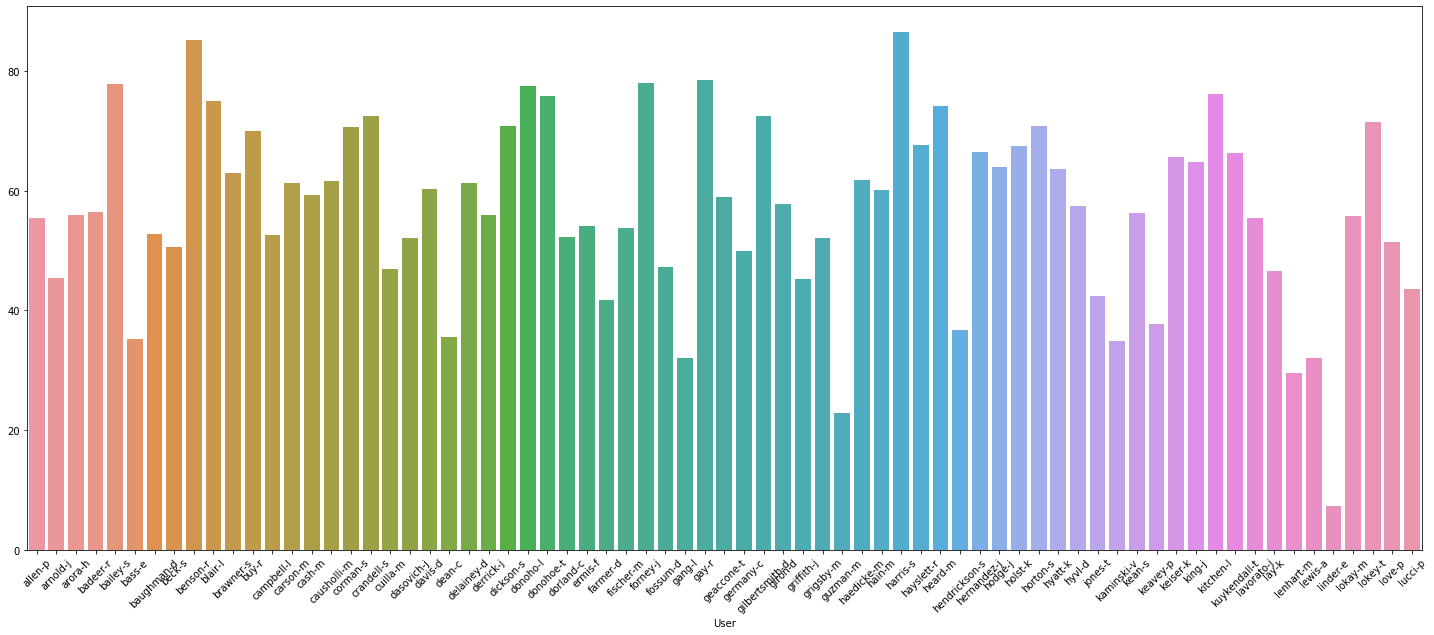

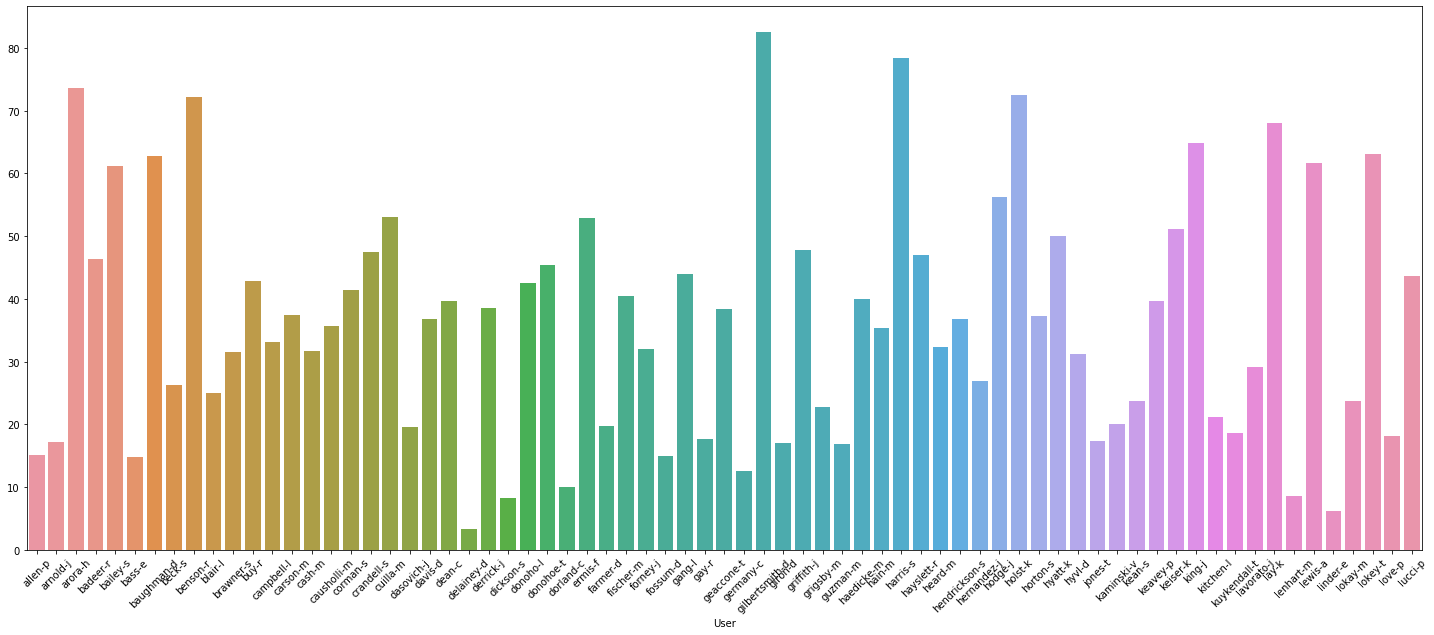

In [27]:
fig = plt.figure(figsize=(25,10))
barUniqueSends = sns.barplot(x=toUsers.index, y=toUsers.values)
barUniqueSends = barUniqueSends.set_xticklabels(barUniqueSends.get_xticklabels(), rotation=45)
fig.savefig('barUniqueSends.png')

fig = plt.figure(figsize=(25,10))
barUniqueRecs = sns.barplot(x=fromUsers.index, y=fromUsers.values)
barUniqueRecs = barUniqueRecs.set_xticklabels(barUniqueRecs.get_xticklabels(), rotation=45)
fig.savefig('barUniqueRecs.png')

In [15]:
linder = small_df[small_df["User"] == 'linder-e']
linder

,Date,From,To,Subject,Cc,Bcc,X-From,X-To,X-cc,X-bcc,X-Folder,X-FileName,Text,Folder,User,Month,Day,Year
262426,2001-04-22 05:42:00-07:00,pete.davis@enron.com,pete.davis@enron.com,Start Date: 4/22/01; HourAhead hour: 13; <COD...,"bert.meyers@enron.com, bill.williams.iii@enron...","bert.meyers@enron.com, bill.williams.iii@enron...",Schedule Crawler<pete.davis@enron.com>,pete.davis@enron.com,"bert.meyers@enron.com, bill.williams.III@enron...",,\eric linder 6-28-02\Notes Folders\All documents,eric linder 6-28-02.nsf,Start Date: 4/22/01; HourAhead hour: 13; No a...,all_documents,linder-e,4,22,2001
262136,2001-04-12 19:41:00-07:00,pete.davis@enron.com,pete.davis@enron.com,Start Date: 4/13/01; HourAhead hour: 3; <CODE...,"bert.meyers@enron.com, bill.williams.iii@enron...","bert.meyers@enron.com, bill.williams.iii@enron...",Schedule Crawler<pete.davis@enron.com>,pete.davis@enron.com,"bert.meyers@enron.com, bill.williams.III@enron...",,\eric linder 6-28-02\Notes Folders\All documents,eric linder 6-28-02.nsf,Start Date: 4/13/01; HourAhead hour: 3; No an...,all_documents,linder-e,4,12,2001
262790,2001-03-20 08:23:00-08:00,kathryn.sheppard@enron.com,"collin.whitehead@enron.com, richard.schweiger@...",XMS electronic expense reporting please read-,1.0,"Collin Whitehead, Richard Schweiger, Bert Meye...",,,\eric linder 6-28-02\Notes Folders\Discussion ...,LINDER-E,eric linder 6-28-02.nsf,None,The new electronic expense reporting system do...,discussion_threads,linder-e,3,20,2001
264538,2001-03-25 11:34:00-08:00,enron.announcements@enron.com,all.worldwide@enron.com,eThink About It: 3/26/01,1.0,All Enron Worldwide,,,\eric linder 6-28-02\Notes Folders\Notes inbox,LINDER-E,eric linder 6-28-02.nsf,None,"OR \nWell, which one is it? You want to ...",notes_inbox,linder-e,3,25,2001
262152,2001-04-13 05:00:00-07:00,amy.fitzpatrick@enron.com,portland.desk@enron.com,Benefit Reimbursement Deadlines,1.0,Portland West Desk,,,\eric linder 6-28-02\Notes Folders\All documents,LINDER-E,eric linder 6-28-02.nsf,None,"Just a reminder, below are the deadlines for f...",all_documents,linder-e,4,13,2001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263640,2001-04-27 10:41:00-07:00,pete.davis@enron.com,pete.davis@enron.com,Start Date: 4/27/01; HourAhead hour: 18; <COD...,"bert.meyers@enron.com, bill.williams.iii@enron...","bert.meyers@enron.com, bill.williams.iii@enron...",Schedule Crawler<pete.davis@enron.com>,pete.davis@enron.com,"bert.meyers@enron.com, bill.williams.III@enron...",,\eric linder 6-28-02\Notes Folders\Notes inbox,eric linder 6-28-02.nsf,Start Date: 4/27/01; HourAhead hour: 18; No a...,notes_inbox,linder-e,4,27,2001
263278,2001-03-30 16:49:00-08:00,pete.davis@enron.com,pete.davis@enron.com,Start Date: 3/31/01; HourAhead hour: 1; <CODE...,"bert.meyers@enron.com, bill.williams.iii@enron...","bert.meyers@enron.com, bill.williams.iii@enron...",Schedule Crawler<pete.davis@enron.com>,pete.davis@enron.com,"bert.meyers@enron.com, bill.williams.III@enron...",,\eric linder 6-28-02\Notes Folders\Discussion ...,eric linder 6-28-02.nsf,Start Date: 3/31/01; HourAhead hour: 1; No an...,discussion_threads,linder-e,3,30,2001
262707,2001-04-01 06:00:00-07:00,pete.davis@enron.com,pete.davis@enron.com,Schedule Crawler: HourAhead Failure <CODESITE>,"bert.meyers@enron.com, bill.williams.iii@enron...","bert.meyers@enron.com, bill.williams.iii@enron...",Schedule Crawler<pete.davis@enron.com>,pete.davis@enron.com,"bert.meyers@enron.com, bill.williams.III@enron...",,\eric linder 6-28-02\Notes Folders\All documents,eric linder 6-28-02.nsf,Start Date: 4/1/01; HourAhead hour: 13; HourA...,all_documents,linder-e,4,1,2001
264072,2001-04-13 06:18:00-07:00,cara.semperger@enron.com,"kathryn.sheppard@enron.com, kathy.axford@enron...",Changes in Preschedule staff,portland.shift@enron.com,portland.shift@enron.com,Cara Semperger,"Kathryn Sheppard, Kathy Axford, Debra Davidson",Portland Shift,,\eric linder 6-28-02\Notes Folders\Notes inbox,eric linder 6-28-02.n

*Note*: This checks out! We said that E. Linder only sends/receives 10-20% of his emails with different people. Looks like him and Pete Davis could be conspiring (/s).<br>
However, if we check the body out, we see that E. Linder sends mostly reminder emails about start dates. Explains it!

In [16]:
topUsers = small_df.groupby("User")["Text"].count().sort_values(ascending=False)
total = len(small_df)
count = 0
users = list(topUsers.keys())
top = []
score = []
for num in topUsers[:10]:
    top.append(users[count])
    score.append((num/total)*100)
    count += 1
    
count = 0
top[:5]
score[:5]
email_usage = (top,score)

['dasovich-j', 'kaminski-v', 'jones-t', 'kean-s', 'farmer-d']

[9.91, 9.5, 7.17, 5.91, 4.784999999999999]

*Note*: Was going to make a graph for this, but kind of repetitive.

In [17]:
small_df.sort_values("User").head(1)

,Date,From,To,Subject,Cc,Bcc,X-From,X-To,X-cc,X-bcc,X-Folder,X-FileName,Text,Folder,User,Month,Day,Year
1230,2001-02-16 02:15:00-08:00,phillip.allen@enron.com,andrew_m_ozuna@mail.bankone.com,,1.0,andrew_m_ozuna@mail.bankone.com,,,\Phillip_Allen_June2001\Notes Folders\Discussi...,Allen-P,pallen.nsf,None,"Andrew,\n\nHere is an asset statement. I will...",discussion_threads,allen-p,2,16,2001


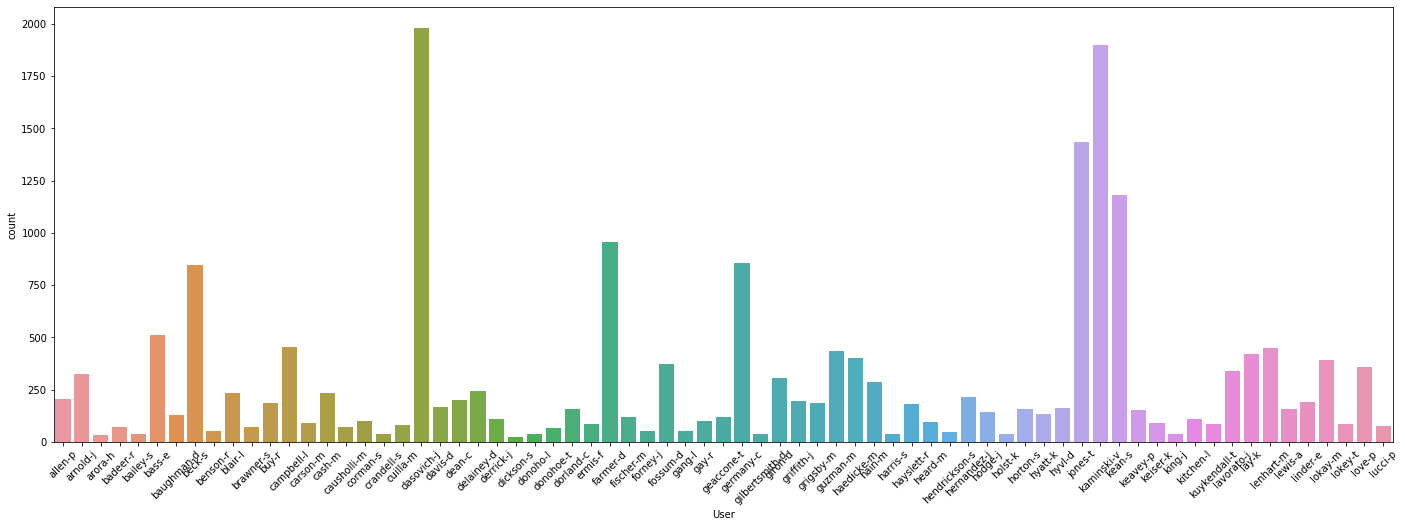

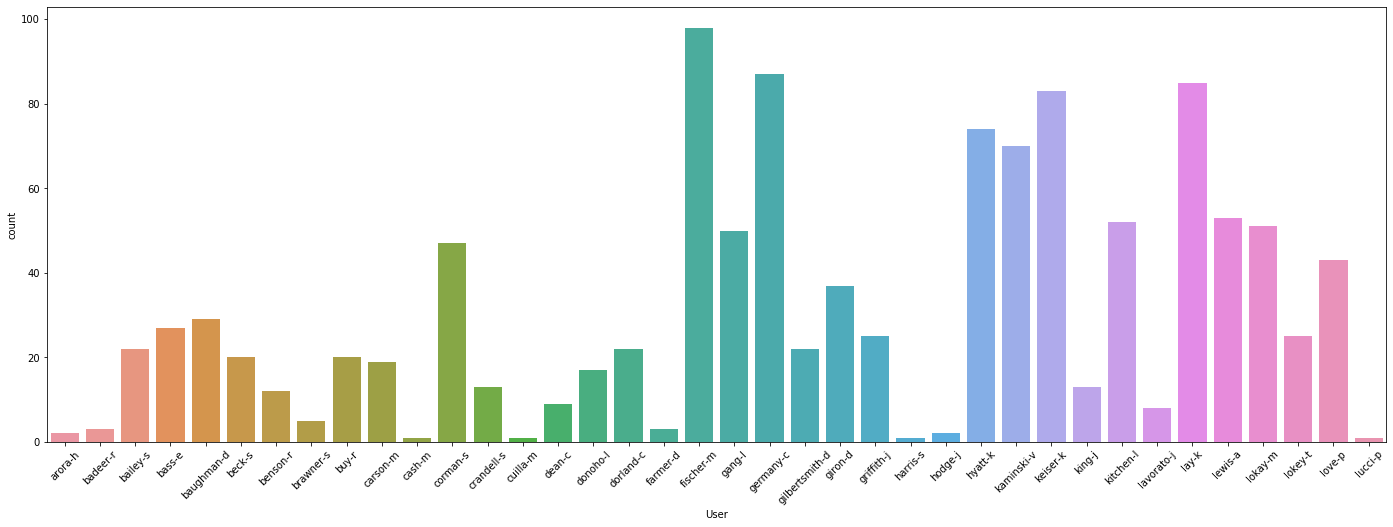

In [18]:
fig = plt.figure(figsize=(24,8))
barUsers = sns.countplot(x='User', data=small_df.sort_values("User"))
barUsers = barUsers.set_xticklabels(barUsers.get_xticklabels(), rotation=45)
fig.savefig('barUsers.png')

fig = plt.figure(figsize=(24,8))
barUsers2000 = sns.countplot(x='User', data=small_df[small_df["Year"] == 2002].sort_values("User"))
barUsers2000 = barUsers2000.set_xticklabels(barUsers2000.get_xticklabels(), rotation=45)
fig.savefig('barUsers2000.png')

**Summary**: So in this section we got to see two things: who is sending/receiving emails from lots of different people, and who sends the most emails!
<a id='2c'>

***Word Data at the User Level***

This is a pretty large dataset, and because of that it's hard to process text for every single user and then append it to the larger dataset. The best way to work with this corpus (without the CRC) is likely to look more on a user by user level.

In [19]:
dasovich = small_df[small_df["User"] == 'dasovich-j']
dasovich

,Date,From,To,Subject,Cc,Bcc,X-From,X-To,X-cc,X-bcc,X-Folder,X-FileName,Text,Folder,User,Month,Day,Year
54587,2001-04-17 00:41:00-07:00,ann.schmidt@enron.com,Enron Mentions,1.0,text/plain; charset=us-ascii,,,\Jeff_Dasovich_June2001\Notes Folders\All docu...,DASOVICH-J,jdasovic.nsf,None,None,Enron Corp. Says First-Quarter Profit Rose 20 ...,all_documents,dasovich-j,4,17,2001
76782,2001-07-30 06:33:00-07:00,jeff.dasovich@enron.com,joseph.alamo@enron.com,trip to NYC,1.0,Joseph Alamo,,,\Jeff_Dasovich_Oct2001\Notes Folders\Sent,DASOVICH-J,jdasovic.nsf,None,"Hi.\n\nPlease book me SF/NYC round trip,leavin...",sent,dasovich-j,7,30,2001
77306,2001-01-03 01:37:00-08:00,jeff.dasovich@enron.com,susan.mara@enron.com,Re: Editorial by George Miller in SF Chronicle...,1.0,Susan J Mara,,,\Jeff_Dasovich_June2001\Notes Folders\Sent,DASOVICH-J,jdasovic.nsf,None,At least there's some consistency in the world...,sent,dasovich-j,1,3,2001
73401,2001-04-19 05:31:00-07:00,steven.kean@enron.com,"jeff.dasovich@enron.com, susan.landwehr@enron.com",,"richard.shapiro@enron.com, james.steffes@enron...","richard.shapiro@enron.com, james.steffes@enron...",Steven J Kean,"Jeff Dasovich, Susan M Landwehr","Richard Shapiro, James D Steffes, Rosalee Flem...",,\Jeff_Dasovich_June2001\Notes Folders\Notes inbox,jdasovic.nsf,I got a voicemail fro Ken. He would be happy ...,notes_inbox,dasovich-j,4,19,2001
69729,2001-07-04 04:00:00-07:00,richard.shapiro@enron.com,paul.dawson@enron.com,Re: Government Secondee,"paul.kaufman@enron.com, jeff.dasovich@enron.co...","paul.kaufman@enron.com, jeff.dasovich@enron.co...",Richard Shapiro,Paul Dawson,"Paul Kaufman, Jeff Dasovich, Mark Schroeder",,\Jeff_Dasovich_Oct2001\Notes Folders\Notes inbox,jdasovic.nsf,Have him get in touch directly with me for the...,notes_inbox,dasovich-j,7,4,2001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66115,2001-08-20 11:05:30-07:00,barry.tycholiz@enron.com,jeff.dasovich@enron.com,RE: Trip to California,stephanie.miller@enron.com,stephanie.miller@enron.com,"Tycholiz, Barry </O=ENRON/OU=NA/CN=RECIPIENTS/...","Dasovich, Jeff </O=ENRON/OU=NA/CN=RECIPIENTS/C...","Miller, Stephanie </O=ENRON/OU=NA/CN=RECIPIENT...",,"\Dasovich, Jeff (Non-Privileged)\Dasovich, Jef...","Dasovich, Jeff (Non-Privileged).pst",Let's plan on getting together on Friday A.M. ...,deleted_items,dasovich-j,8,20,2001
74928,2001-01-31 03:03:00-08:00,borenste@haas.berkeley.edu,jeff.dasovich@enron.com,POWER conference sponsorship by ENRON,1.0,Jeffrey Dasovich <jeff.dasovich@enron.com>,,,\Jeff_Dasovich_June2001\Notes Folders\Notes inbox,DASOVICH-J,jdasovic.nsf,None,Hi Jeff:\n\nI'm sending this as a separate ema...,notes_inbox,dasovich-j,1,31,2001
76353,2001-06-21 11:13:00-07:00,jeff.dasovich@enron.com,richard.costigan@asm.ca.gov,Re: Please see attached documents,1.0,"""Costigan, Richard"" <Richard.Costigan@asm.ca.gov>",,,\Jeff_Dasovich_Oct2001\Notes Folders\Sent,DASOVICH-J,jdasovic.nsf,None,"Greetings Richard:\nWhen you get a moment, ple...",sent,dasovich-j,6,21,2001
58391,2000-10-19 13:45:00-07:00,jeff.dasovich@enron.com,donald.lassere@enron.com,Re: California Tariff,1.0,Donald Lassere,,,\Jeff_Dasovich_Dec2000\Notes Folders\All docum...,DASOVICH-J,jdasovic.nsf,None,yes. be happy to talk tomorrow. just give a ...,all_documents,dasovich-j,10,19,2000


In [20]:
text = dasovich["Text"]
toks_count = []
for email in text:
    toks_count.append(len(nltk.word_tokenize(email)))

In [21]:
toks_count[:5]
count = 0
for tokC in toks_count:
    count+=tokC
avg_WCount = count/len(dasovich)
avg_WCount

[8599, 94, 187, 118, 504]

772.0025227043391

*Note*: Average email length of J. Dasovich is around 750 words! Let's plot it though.

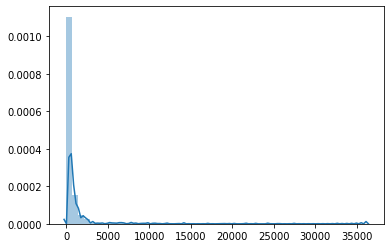

In [22]:
fig = plt.figure()
sns.distplot(toks_count)
fig.savefig('toksDistr.png')

## Unsupervised Learning

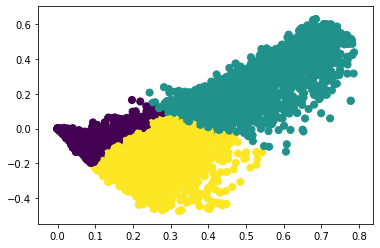

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans

text = small_df['Text']
model = make_pipeline(TfidfVectorizer(max_features = 3000, stop_words = 'english'), TruncatedSVD())
labels = model.fit_transform(text)

kmeans = KMeans(n_clusters = 3, max_iter=600, algorithm = 'auto')
fit_predicted = kmeans.fit(labels)
predicted = kmeans.predict(labels)

fig = plt.figure()
plt.scatter(labels[:, 0], labels[:, 1], c=predicted, s=50, cmap='viridis')
fig.savefig('cluster.png')

*Note*: Great! We got a TFIDF vector, took care of the sparseness with SVD, then fit a kmeans around the TFIDF vector. The only question now is, what is the right number of clusters? Well luckily we have the elbow method for that.

[KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
        n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
        random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
        n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
        random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
        n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
        random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
        n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
        random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
        n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
        random_state=None, tol=0.0001, verbose=0),
 KMeans(algorit

Text(0.5, 0, 'Number of Clusters')

Text(0, 0.5, 'Score')

Text(0.5, 1.0, 'Elbow Method')

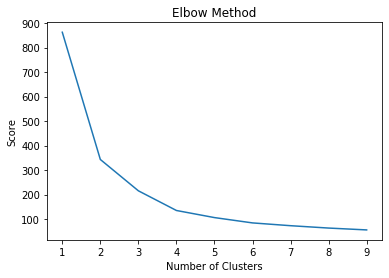

In [24]:
num_clusters = range(1, 10)

kmeans = [KMeans(n_clusters=i, max_iter = 600) for i in num_clusters]
kmeans
score = [kmeans[i].fit(labels).score(labels) for i in range(len(kmeans))]
score = [i*-1 for i in score]

fig = plt.figure()
plt.plot(num_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Method')
plt.show()
fig.savefig('elbow.png')

*Note*: So, I think somebody broke the Enron Corpus' arm, because I can't tell whether the elbow is at 2, 3, or 4. Now we need to decide on a size and get the most informative features so we can start to size up each cluster.

In [25]:
vect = TfidfVectorizer(stop_words='english')
text = small_df["Text"]
text = model.fit_transform(text)
tfidf = normalize(text)

In [26]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        print(features[:10])
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs
top_feats = get_top_features_cluster(tfidf, predicted, 20)

NameError: name 'vectorizer' is not defined

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = top_feats[1][:15])